In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!pwd

/root/predicting-coronavirus


In [50]:
%matplotlib inline
%cd /root/predicting-coronavirus

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from datetime import datetime

import src.data_import as di
from src.poly_reg import model_county
from src.poly_reg import model_county_by_fips
from src.poly_reg import model_state
from sklearn.metrics import mean_squared_error
from math import sqrt

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)



/root/predicting-coronavirus


In [55]:
nyt_df = di.extract_full_nyt()

In [56]:
nyt_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
141398,2020-05-13,Sublette,Wyoming,56035,3,0
141399,2020-05-13,Sweetwater,Wyoming,56037,20,0
141400,2020-05-13,Teton,Wyoming,56039,99,1
141401,2020-05-13,Uinta,Wyoming,56041,9,0


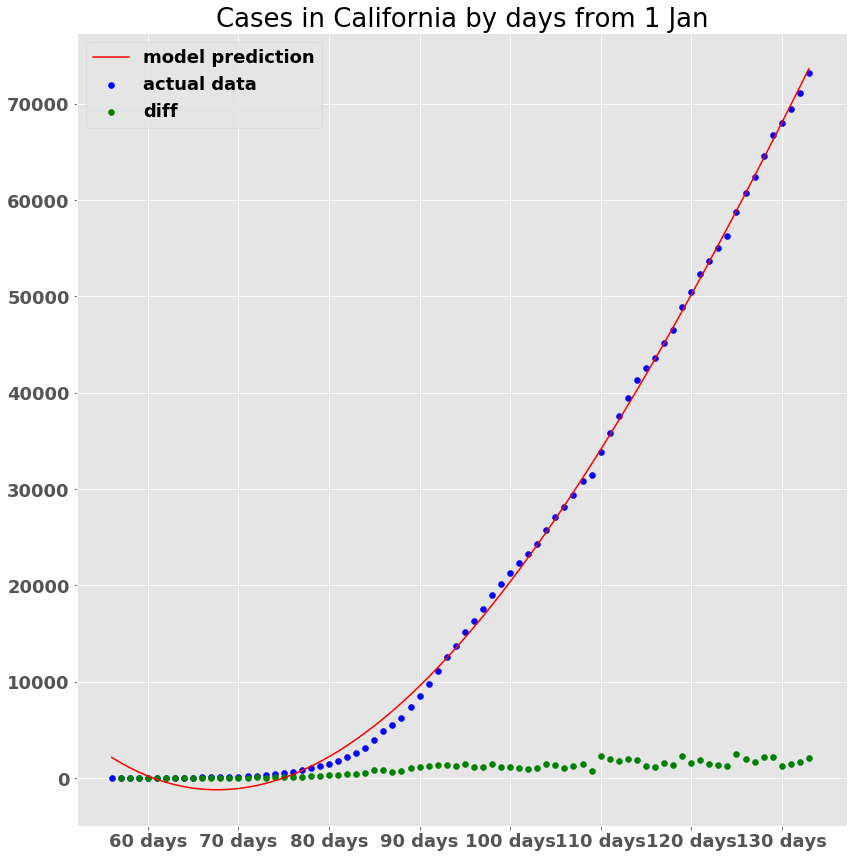

In [57]:
state = "California"
#df2 = df[df['cases'] > 100]
df2 = nyt_df[nyt_df['cases'] > 10]

X, X_poly, y, lin = model_state(df2, state, degree=3)
diffed = pd.DataFrame(y).diff()#.values[1:]

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue', label="actual data") 
plt.scatter(X, diffed, color = 'green', label="diff") 
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red', label="model prediction") 
plt.title('Cases in {} by days from 1 Jan'.format(state)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

  
plt.show() 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


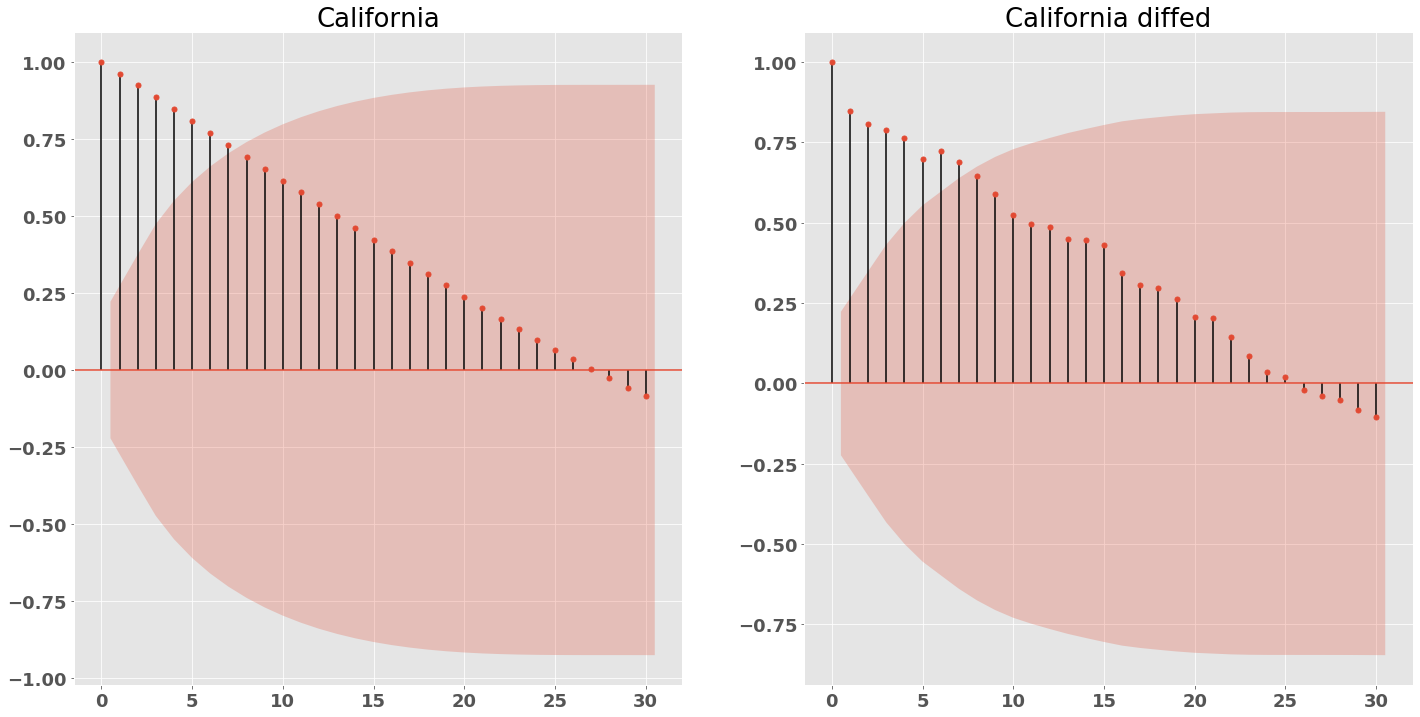

In [58]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1,2, figsize=(24,12))
acf_array = acf(y)
#print(acf_array)

plot_acf(y, alpha=0.05, lags=30, ax=axs[0], title=state)
plot_acf(diffed[1:], alpha=0.05, lags=30, ax=axs[1], title=state+' diffed')
plt.show()
#lin.coef_

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


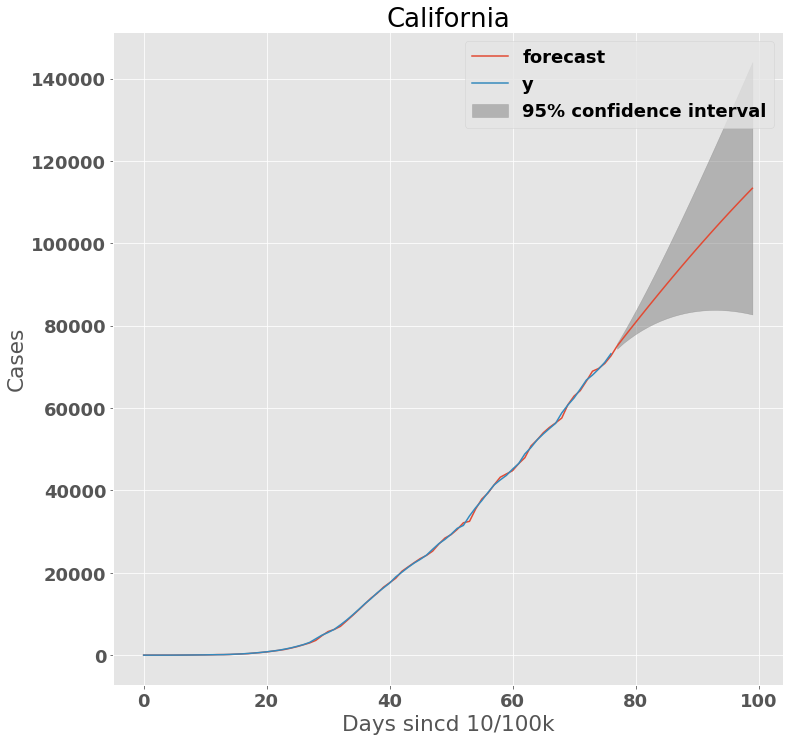

In [70]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(y, order=(3,0))
model_diffed = ARMA(diffed[1:], order=(1,0))
res = model.fit()
res_diffed = model_diffed.fit()

#print(res.summary())
#print(res.params)
fig, axs = plt.subplots(1,1, figsize=(12,12))
#fig, axs = plt.subplots(1,2, figsize=(24,12))
axs.set_title('California')
axs.set_xlabel('Days sincd 10/100k')
axs.set_ylabel('Cases')
res.plot_predict(start=1, end=100, ax=axs)
#res_diffed.plot_predict(start=1, end=100, ax=axs[1])
plt.show()

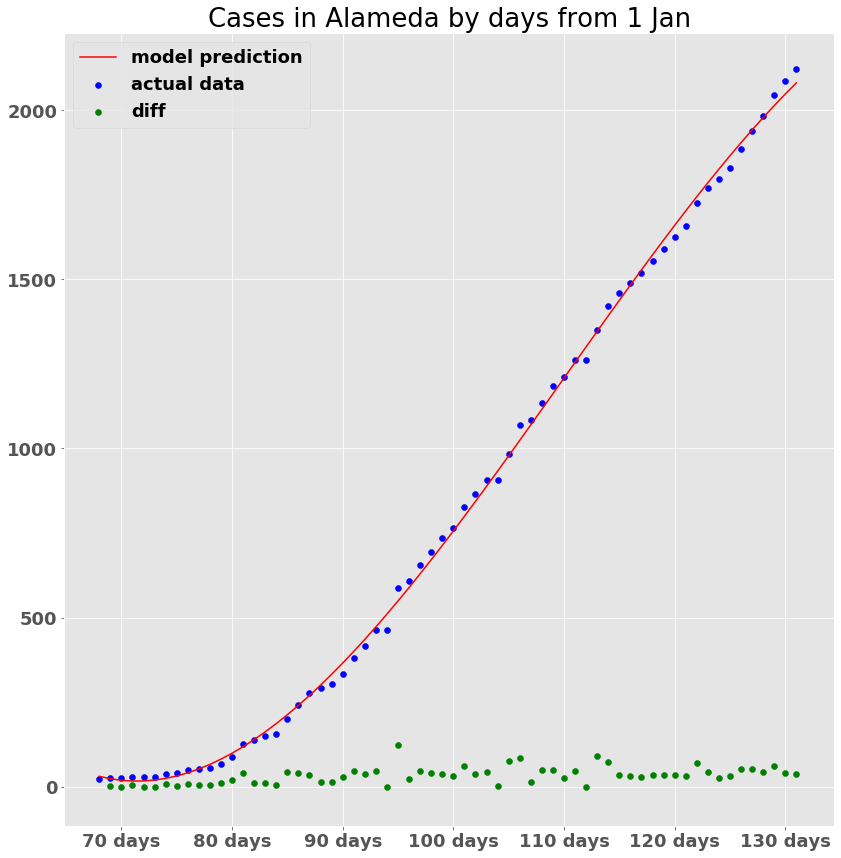

In [57]:
county = "Alameda"
st = "California"
#df2 = df[df['cases'] > 100]
df2 = nyt_df[nyt_df['cases'] > 10]

X, X_poly, y, lin = model_county(df2, county, st, degree=3)
diffed = pd.DataFrame(y).diff()#.values[1:]

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue', label="actual data") 
plt.scatter(X, diffed, color = 'green', label="diff") 
#print(X)
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red', label="model prediction") 
plt.title('Cases in {} by days from 1 Jan'.format(county)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

  
plt.show() 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


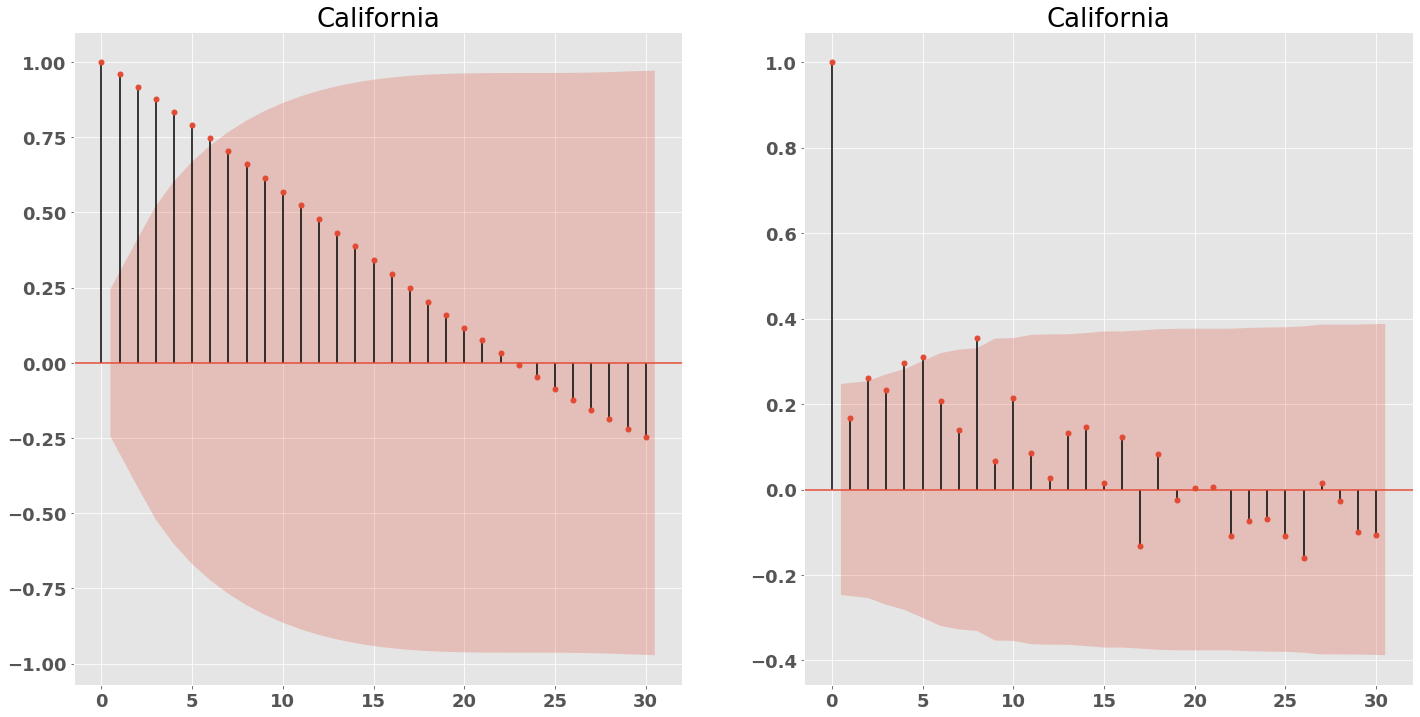

array([[ 0.00000000e+00, -3.30283525e+02,  3.42634283e+00,
        -1.03942787e-02]])

In [58]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1,2, figsize=(24,12))
acf_array = acf(y)
#print(acf_array)

plot_acf(y, alpha=0.05, lags=30, ax=axs[0], title=st)
plot_acf(diffed[1:], alpha=0.05, lags=30, ax=axs[1], title=st)
plt.show()
lin.coef_

In [42]:
len(y)

64

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


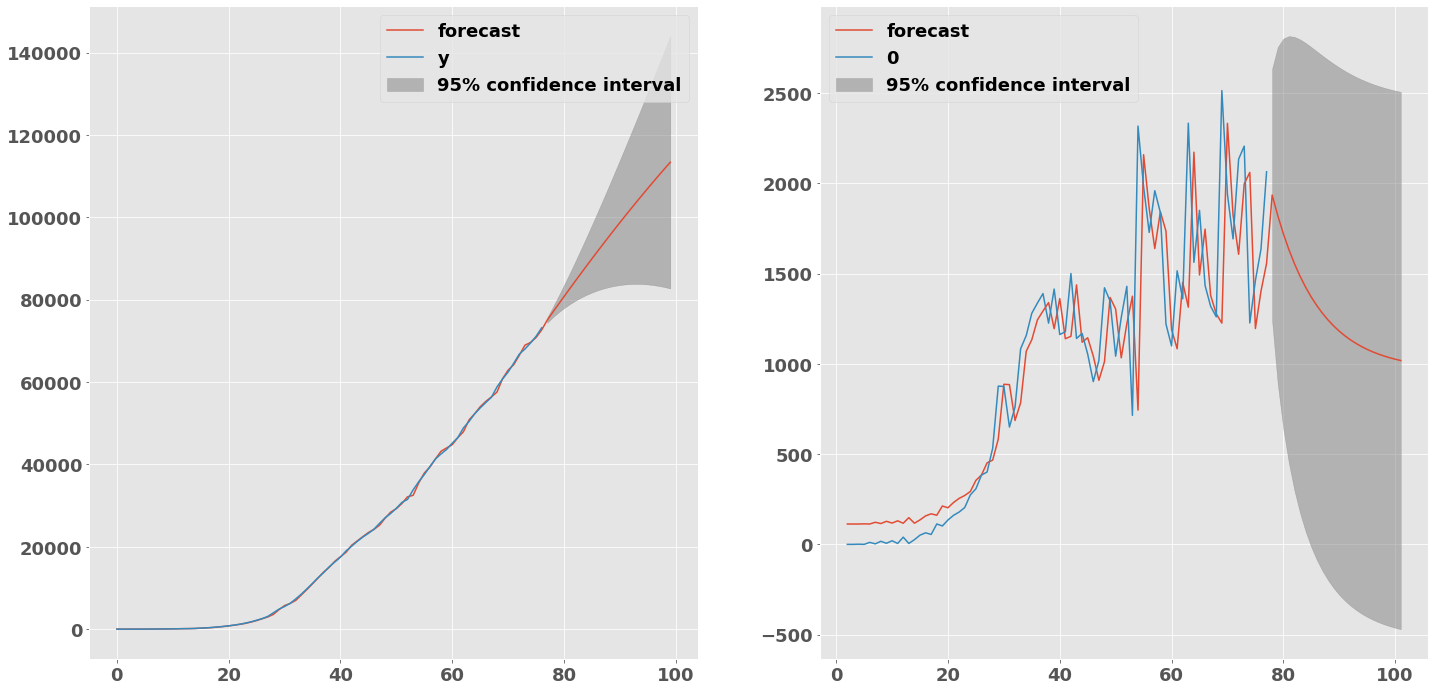

In [19]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(y, order=(3,0))
model_diffed = ARMA(diffed[1:], order=(1,0))
res = model.fit()
res_diffed = model_diffed.fit()

#print(res.summary())
#print(res.params)
fig, axs = plt.subplots(1,2, figsize=(24,12))
res.plot_predict(start=1, end=100, ax=axs[0])
res_diffed.plot_predict(start=1, end=100, ax=axs[1])
plt.show()

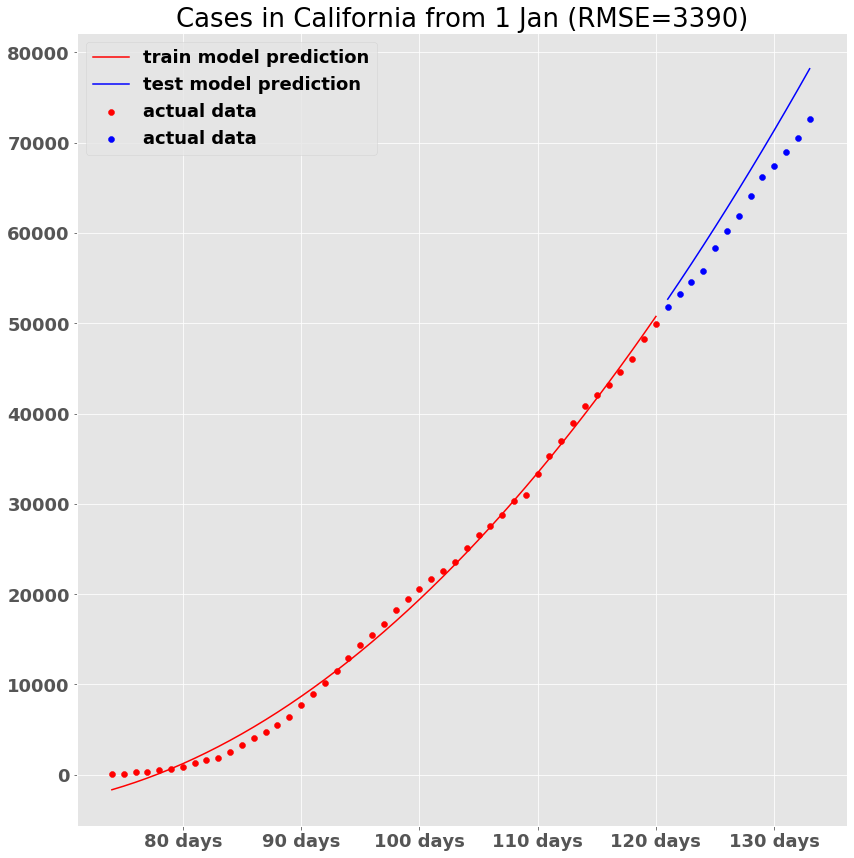

In [71]:
state = "California"
degree = 2
threshold_date = datetime(2020,5,1)

df2 = nyt_df[nyt_df['cases'] > 100]
train = df2[df2['date'] < threshold_date]
test = df2[df2['date'] >= threshold_date]


X, X_poly, y, lin = model_state(train, state, degree=degree)
X_test, X_poly_test, y_test, lin_test = model_state(test, state, degree=degree)

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'red', label="actual data") 
plt.scatter(X_test, y_test, color = 'blue', label="actual data") 

y_train = lin.predict(X_poly)
y_pred = lin.predict(X_poly_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

plt.plot(X, y_train, color = 'red', label="train model prediction") 
plt.plot(X_test, y_pred, color = 'blue', label="test model prediction") 
plt.title('Cases in {0} from 1 Jan (RMSE={1:0.0f})'.format(state, rmse)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

 
plt.show()


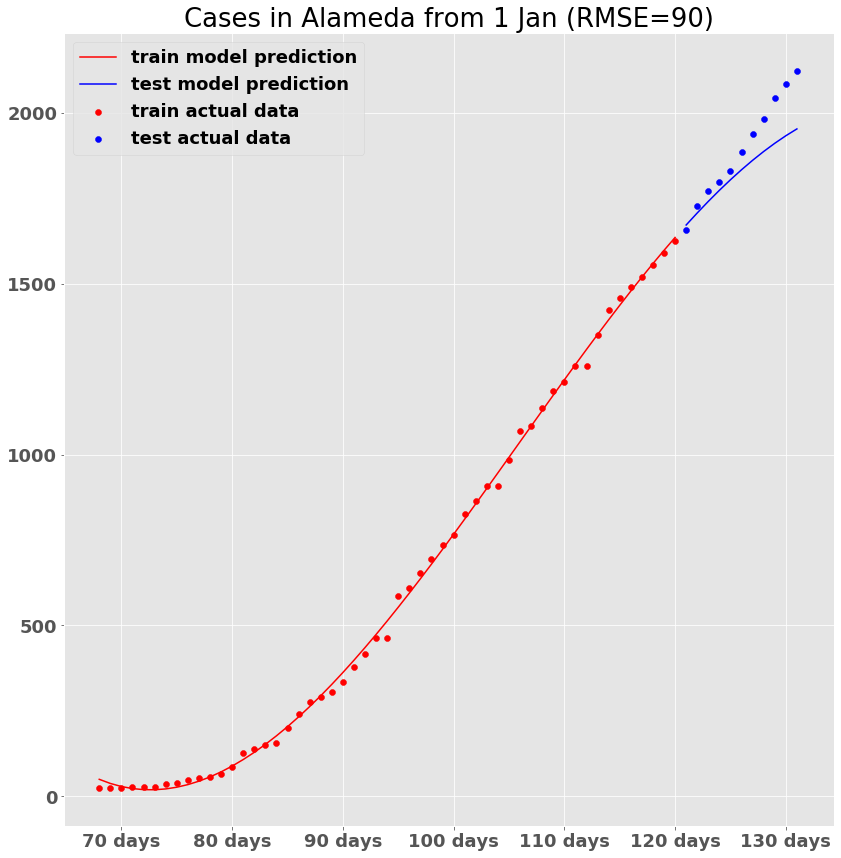

In [113]:
state = "California"
county = "Alameda"
degree = 3
threshold_date = datetime(2020,5,1)

df2 = nyt_df[nyt_df['cases'] > 10]
train = df2[df2['date'] < threshold_date]
test = df2[df2['date'] >= threshold_date]


X, X_poly, y, lin = model_county(train, county, state, degree=degree)
X_test, X_poly_test, y_test, lin_test = model_county(test, county, state, degree=degree)

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'red', label="train actual data") 
plt.scatter(X_test, y_test, color = 'blue', label="test actual data") 

y_train = lin.predict(X_poly)
y_pred = lin.predict(X_poly_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

#print(y1)
plt.plot(X, y_train, color = 'red', label="train model prediction") 
plt.plot(X_test, y_pred, color = 'blue', label="test model prediction") 
plt.title('Cases in {0} from 1 Jan (RMSE={1:0.0f})'.format(county, rmse)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

 
plt.show()


In [83]:
df2.head(100)

,fips,death_rate,case_rate,days_since_sip,days_since_sip_lifted,days_since_10p100k,median_hhi,hs,ba_plus,ma_plus,median_house_price,median_rent,percent_big_buildings,percent_commuter,international,percent_over_65,pop_density,hh_density
51,53061,0.420560,14.999965,53,0,64,105073,0.234,0.221,0.106,455000,1525,0.091,5.9,1.742643e+06,0.154041,131.952143,55.533533
52,53061,0.420560,18.504630,53,0,64,105073,0.234,0.221,0.106,455000,1525,0.091,5.9,1.742643e+06,0.154041,131.952143,55.533533
53,53061,0.420560,21.588735,53,0,64,105073,0.234,0.221,0.106,455000,1525,0.091,5.9,1.742643e+06,0.154041,131.952143,55.533533
54,53061,0.420560,24.532653,53,0,64,105073,0.234,0.221,0.106,455000,1525,0.091,5.9,1.742643e+06,0.154041,131.952143,55.533533
55,53061,0.420560,27.897131,53,0,64,105073,0.234,0.221,0.106,455000,1525,0.091,5.9,1.742643e+06,0.154041,131.952143,55.533533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,17031,20.636517,472.522343,56,0,55,94922,0.235,0.230,0.163,255900,1113,0.186,19.1,6.832825e+06,0.145907,2121.674950,809.430220
204,17031,21.984051,496.874203,56,0,55,94922,0.235,0.230,0.163,255900,1113,0.186,19.1,6.832825e+06,0.145907,2121.674950,809.430220
205,17031,23.485589,531.621324,56,0,55,94922,0.235,0.230,0.163,255900,1113,0.186,19.1,6.832825e+06,0.145907,2121.674950,809.430220
206,17031,24.390361,559.380519,56,0,55,94922,0.235,0.230,0.163,255900,1113,0.186,19.1,6.832825e+06,0.145907,2121.674950,809.430220


In [81]:
def model_county2(df, county, state, degree=2): 
    try:
        county_df = df[df['state'] == state]
        county_df = df[df['county'] == county]
        #county_df = county_df[county_df['cases'] > 10]
        grouped = county_df.groupby('date')
        cases = grouped['cases_rate'].agg([np.sum])['sum'].reset_index()
        deaths = grouped['deaths_rate'].agg([np.sum])['sum'].reset_index()
        y = cases.iloc[:,1]
        X = cases.iloc[:,0].apply(days_since_1jan)
        X = X[:, np.newaxis]
        y = y[:, np.newaxis]
        #print("{} : {}".format(county, X))
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y)
        lin = LinearRegression()
        lin.fit(X_poly, y)
        return X, X_poly, y, lin 
    except Exception:
        return None, None, None, None


state = "California"
county = "Alameda"
degree = 3
threshold_date = datetime(2020,5,1)

final_df = pd.read_csv('./data/final_df.csv')
#df2 = nyt_df[nyt_df['cases'] > 10]
df2 = final_df[final_df['case_rate'] > 10]

train = df2[df2['date'] < threshold_date]
test = df2[df2['date'] >= threshold_date]


X, X_poly, y, lin = model_county2(train, county, state, degree=degree)
X_test, X_poly_test, y_test, lin_test = model_county2(test, county, state, degree=degree)

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'red', label="train actual data") 
plt.scatter(X_test, y_test, color = 'blue', label="test actual data") 

y_train = lin.predict(X_poly)
y_pred = lin.predict(X_poly_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

#print(y1)
plt.plot(X, y_train, color = 'red', label="train model prediction") 
plt.plot(X_test, y_pred, color = 'blue', label="test model prediction") 
plt.title('Cases in {0} from 1 Jan (RMSE={1:0.0f})'.format(county, rmse)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

 
plt.show()

KeyError: 'date'

['Alameda' 'Contra Costa' 'El Dorado' 'Fresno' 'Humboldt' 'Imperial'
 'Kern' 'Los Angeles' 'Madera' 'Marin' 'Merced' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Solano' 'Sonoma' 'Stanislaus' 'Sutter' 'Tulare' 'Ventura' 'Yolo' 'Butte'
 'Shasta' 'Inyo' 'Yuba' 'Kings' 'Calaveras' 'Mendocino' 'Mariposa']


AttributeError: 'NoneType' object has no attribute 'predict'

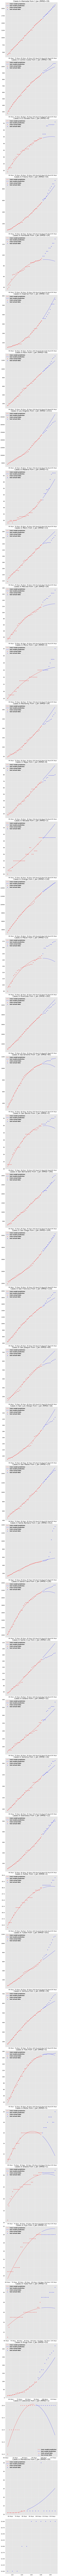

In [22]:
def plot_counties(df, state):
    degree = 2
    start_date = datetime(2020,4,1)
    threshold_date = datetime(2020,5,1)
    df2 = df[df['date'] > start_date]    
    counties = df2[df2['state'] == state]['county'].unique()
    print(counties)
    fig, axs = plt.subplots(len(counties), 1, figsize=(12, 12*len(counties)))
    fig.tight_layout()

    for i, county in enumerate(counties):
        train = df2[df2['date'] < threshold_date]
        test = df2[df2['date'] >= threshold_date]
        if(len(test) < 1 or len(train) < 1):
            break
        X, X_poly, y, lin = model_county(train, county, state, degree=degree)
        X_test, X_poly_test, y_test, lin_test = model_county(test, county, state, degree=degree)
        #print(county, y)

        #y = pd.DataFrame(y).diff()

        axs[i].scatter(X, y, color = 'red', label="train actual data") 
        axs[i].scatter(X_test, y_test, color = 'blue', label="test actual data") 

        y_train = lin.predict(X_poly)
        y_pred = lin.predict(X_poly_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))

        #print(y1)
        axs[i].plot(X, y_train, color = 'red', label="train model prediction") 
        axs[i].plot(X_test, y_pred, color = 'blue', label="test model prediction") 
        axs[i].set_title('Cases in {0} from 1 Jan (RMSE={1:0.0f})'.format(county, rmse)) 
        axs[i].legend()
        xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
        axs[i].set_xticklabels(xlabels)


    plt.show()
plot_counties(df, 'California')

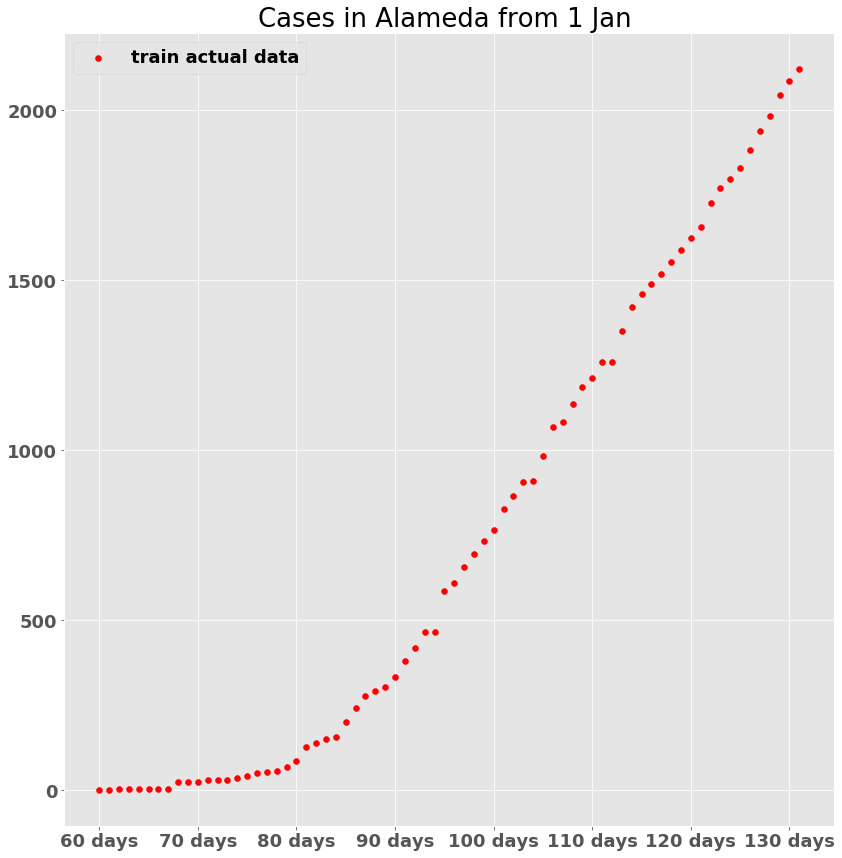

In [130]:
state = "California"
county = "Alameda"
degree = 3
threshold_date = datetime(2020,5,15)

df2 = nyt_df[nyt_df['cases'] > -1]
train = df2[df2['date'] < threshold_date]
test = df2[df2['date'] >= threshold_date]


X, X_poly, y, lin = model_county(train, county, state, degree=degree)
X_test, X_poly_test, y_test, lin_test = model_county(test, county, state, degree=degree)

#y = pd.DataFrame(y).diff()
fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'red', label="train actual data") 
#plt.scatter(X_test, y_test, color = 'blue', label="test actual data") 

y_train = lin.predict(X_poly)
#y_pred = lin.predict(X_poly_test)
#rmse = sqrt(mean_squared_error(y_test, y_pred))

#print(y1)
#plt.plot(X, y_train, color = 'red', label="train model prediction") 
#plt.plot(X_test, y_pred, color = 'blue', label="test model prediction") 
plt.title('Cases in {0} from 1 Jan '.format(county)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

 
plt.show()


In [21]:
params = []
for state in nyt_df.state.unique():
    X, X_poly, y, lin = model_state(nyt_df, state)
    if not X is None:
        params.append([state, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
parms = pd.DataFrame(params)

In [22]:
parms.describe()

,1,2,3
count,51.000000,51.000000,51.000000
mean,8134.466352,-405.857650,3.996028
std,28103.104925,645.194464,5.045271
min,-116601.554924,-2295.060856,-1.899625
25%,733.987540,-770.929059,0.738961
50%,6562.468531,-236.518748,2.007799
75%,20654.873821,-62.997031,6.185470
max,56404.452837,997.917469,24.252102


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f55185410>,
      dtype=object)

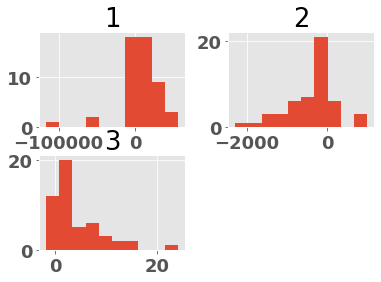

In [23]:
parms.hist()

In [31]:
nyt_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
141398,2020-05-13,Sublette,Wyoming,56035,3,0
141399,2020-05-13,Sweetwater,Wyoming,56037,20,0
141400,2020-05-13,Teton,Wyoming,56039,99,1
141401,2020-05-13,Uinta,Wyoming,56041,9,0


In [32]:
params = []
for fips in nyt_df.fips.unique():
    X, X_poly, y, lin = model_county_by_fips(nyt_df, fips)
    if not X is None:
        params.append([state, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
county_parms = pd.DataFrame(params)

count     2890.000000
mean        44.512718
std       2540.854406
min     -48699.143107
25%       -130.174228
50%        -12.007711
75%         75.270291
max      25778.024494
Name: 1, dtype: float64

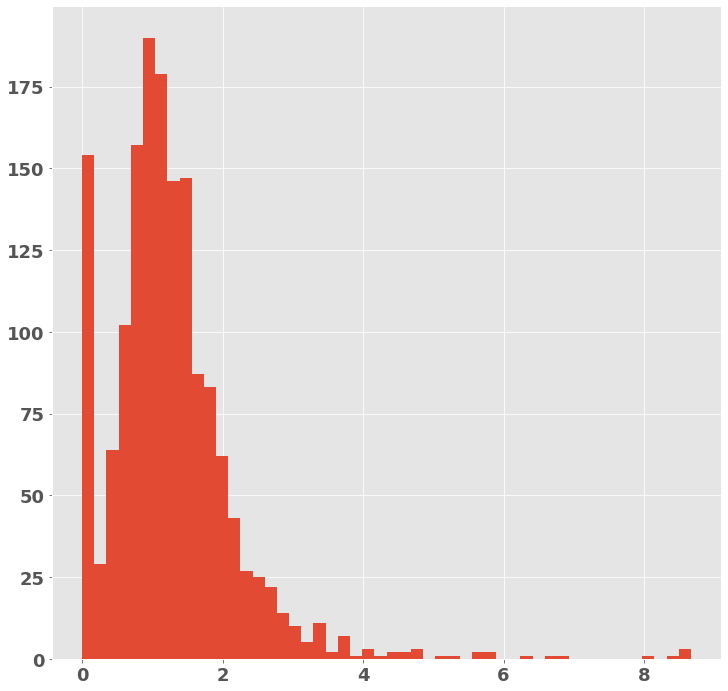

In [47]:
fig, ax = plt.subplots(figsize=(12,12))
xxx = ax.hist(county_parms[2]**.333, bins=50)
county_parms[1].describe()